# Figuras reto 1

Cargamos las librerías básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/home/jsm/programs/soft/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Por defecto los plots se ralizarán inline

In [2]:
%matplotlib inline

## Lectura de datos

Leemos los datos de un archivo en el que ya se han sustituido las comas decimales por puntos.

In [3]:
data = pd.read_csv("Card Analytics Dataset_dot.txt", sep="|")

Las columnas son las siguientes:

In [4]:
data.columns

Index([u'CP_CLIENTE', u'CP_COMERCIO', u'SECTOR', u'DIA', u'FRANJA_HORARIA',
       u'IMPORTE', u'NUM_OP'],
      dtype='object')

In [5]:
data["SECTOR"].unique()

array(['ALIMENTACION', 'AUTO', 'BELLEZA', 'HOGAR', 'MODA Y COMPLEMENTOS',
       'OCIO Y TIEMPO LIBRE', 'OTROS', 'RESTAURACION', 'SALUD',
       'TECNOLOGIA'], dtype=object)

In [6]:
data["CP_COMERCIO"].unique()

array([4006, 4009, 4007, 4008, 4005, 4001, 4004, 4003, 4002])

In [7]:
data["CP_CLIENTE"].unique()

array([4007, 4002, 4009, 4729, 4760, 4120, 4230, 4110, 4800, 4005, 4470,
       4779, 4006, 4400, 4008, 4610, 4004, 4639, 4240, 4745, 4003, 4867,
       4738, 4270, 4720, 4131, 4628, 4279, 4130, 4878, 4430, 4500, 4117,
       4410, 4150, 4820, 4713, 4850, 4617, 4619, 4001, 4700, 4160, 4860,
       4740, 4260, 4113, 4100, 4750, 4250, 4116, 4200, 4620, 4600, 4630,
       4770, 4618, 4140, 4716, 4830, 4531, 4271, 4810, 4151, 4458, 4560,
       4711, 4520, 4460, 4721, 4420, 4638, 4887, 4660, 4712, 4568, 4550,
       4569, 4728, 4459, 4710, 4869, 4450, 4275, 4567, 4276, 4889, 4890,
       4540, 4661, 4409, 4280, 4510, 4480, 4715, 4888, 4692, 4650, 4288,
       4717, 4870, 4880, 4118, 4746, 4859, 4532, 4727, 4530, 4868, 4857,
       4210, 4479, 4431, 4114, 4825, 4640, 4213, 4149, 4897, 4877, 4838,
       4440, 4621, 4813, 4211, 4815, 4879, 4629, 4616, 4648, 4115, 4741,
       4212, 4662, 4259, 4278, 4811, 4898, 4769, 4647, 4549, 4778, 4839,
       4812, 4743, 4558, 4691, 4693])

En la columna "SECTOR" hay 10 sectores distintos. Los Códigos postales de los comercios donde se efectuan las transacciones son de Almería ciudad mientras que los códigos de los clientes pertenecen a toda la provincia.

In [8]:
data[["IMPORTE", "NUM_OP"]].describe()

IMPORTE         NUM_OP
count  890610.000000  890610.000000
mean      110.295745       2.411702
std       214.617843       4.326982
min         0.010000       1.000000
25%        22.000000       1.000000
50%        47.960000       1.000000
75%       109.767500       2.000000
max     20000.000000     111.000000

Los importes van desde 1 centimo de euro hasta 20000 euros pero parece que pueden estar agregadas cuando el resto de parámetros coinciden. En este caso el número de operaciones agragadas se marcaría con "NUM_OP".

La columna "DIA" y "FRANJA_HORARIA" se pueden combinar en una columna con la fecha que es más práctica para su tratamiento. Se tomara la hora central de la franja horaria. 

In [9]:
def parse_row(row):
    dia = row["DIA"]
    horas = [int(a) for a in row["FRANJA_HORARIA"].split("-")]
    hora = (horas[0]+horas[1])/2
    return "{}T{:02d}:00:00".format(dia, hora)
data['T'] = pd.to_datetime(data.apply(parse_row, axis=1))

También generamos columnas adicionales que indican el día de la semana (de lunes a domingo), la semana del año y la hora dentro de una semana (desde 0 hasta 167) que permite ver las variaciones horarias pero en el marco de una semana completa.

In [59]:
data['weekday'] = data['T'].apply(lambda x: x.weekday())
data['weekofyear'] = data['T'].apply(lambda x: x.weekofyear)
data['weektime'] = data['T'].apply(lambda x: x.weekday()*24+x.hour)
data['dayofyear'] = data['T'].apply(lambda x: x.dayofyear)

## Figuras
### Anuales con resolución de 2 horas

Creamos primero una vista general del gasto en distintos sectores con la máxima resolución y durante todo el año.

Primero miramos los importes gastados en alimentación.

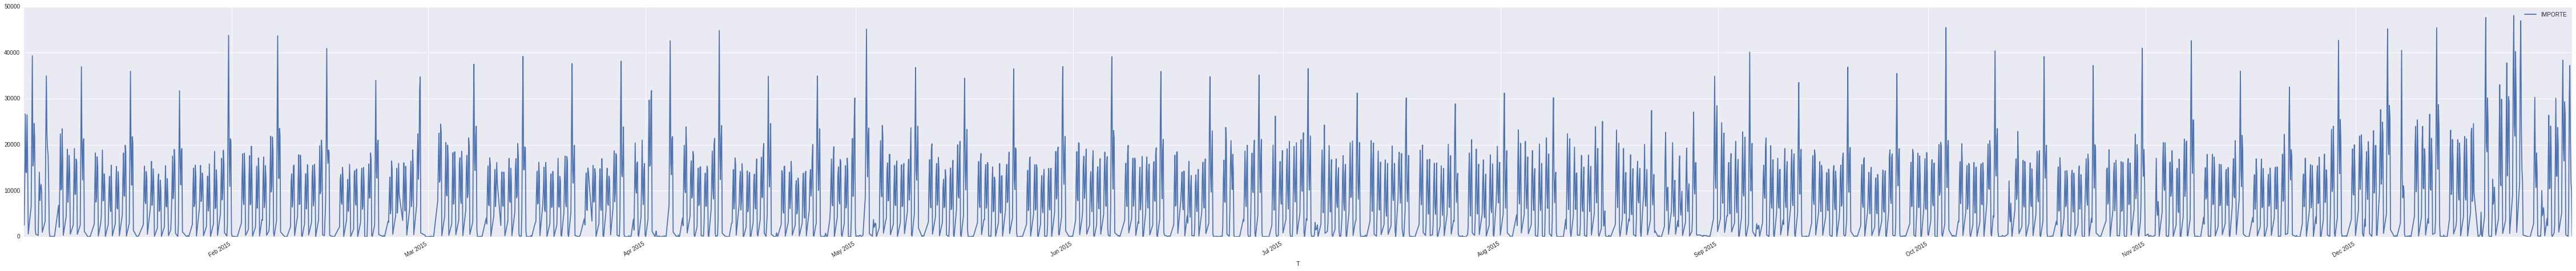

In [11]:
data[data['SECTOR'] == "ALIMENTACION"][["T","IMPORTE"]].groupby("T").sum().plot(figsize=(80,8))
plt.savefig("alimentacion_2horas.svg")

La segunda figura interesante sería para moda y complementos

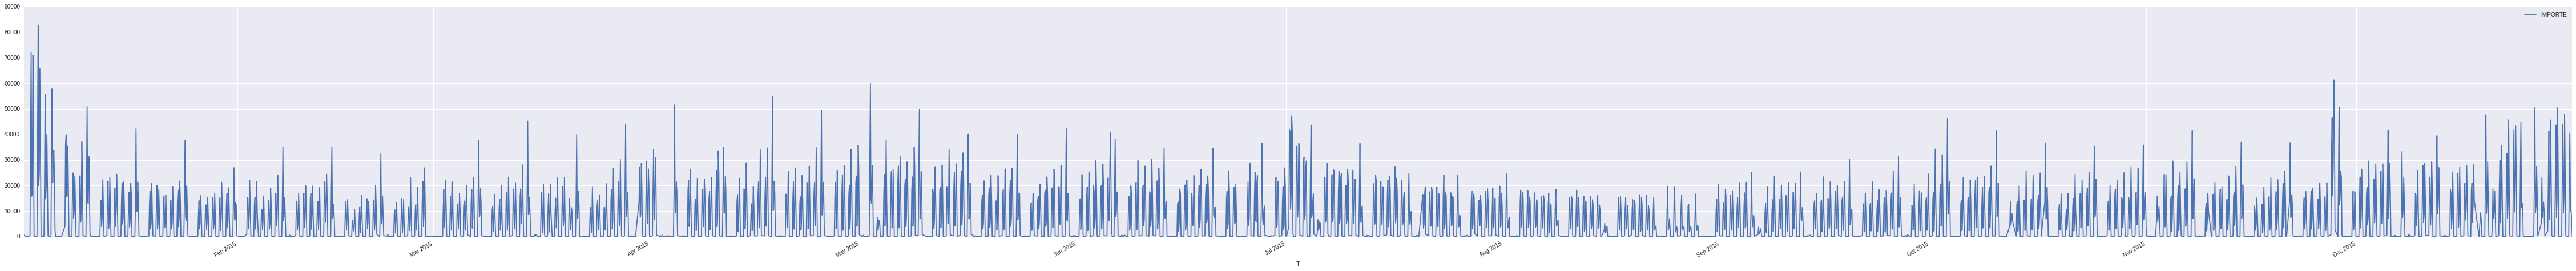

In [12]:
data[data['SECTOR'] == "MODA Y COMPLEMENTOS"][["T","IMPORTE"]].groupby("T").sum().plot(figsize=(80,8))
plt.savefig("myc_2horas.svg")

El otro sector que se diferencia claramente es la restauración

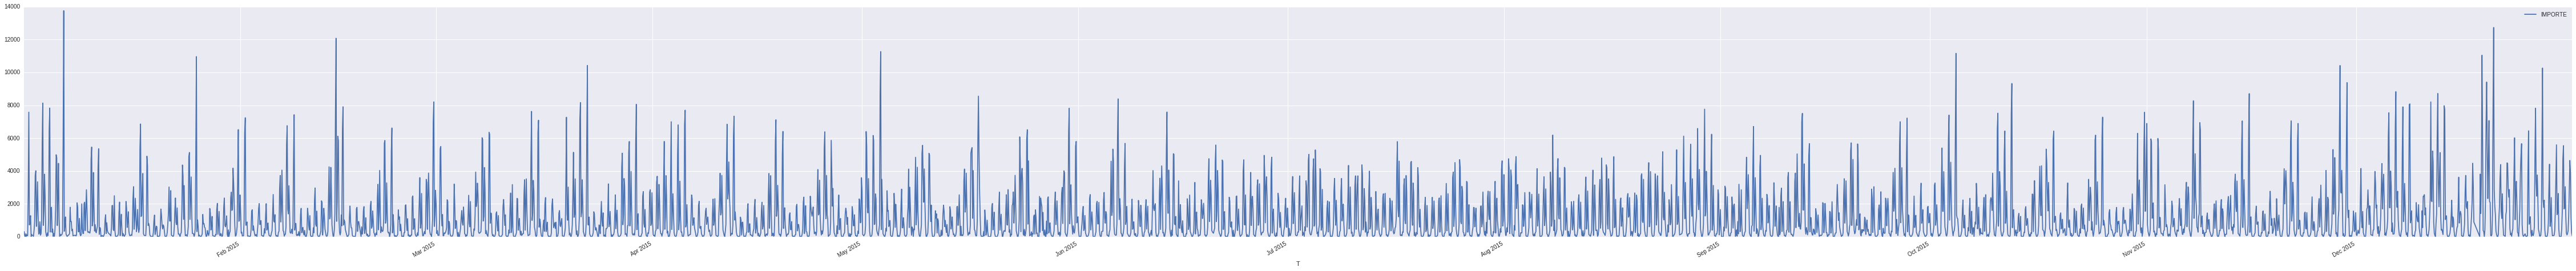

In [13]:
data[data['SECTOR'] == "RESTAURACION"][["T","IMPORTE"]].groupby("T").sum().plot(figsize=(80,8))
plt.savefig("restauracion_2horas.svg")

### Tendencia semanal por sectores

La tendencia general en gasto para cada día de la semana para los distintos sectores

/home/jsm/programs/soft/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


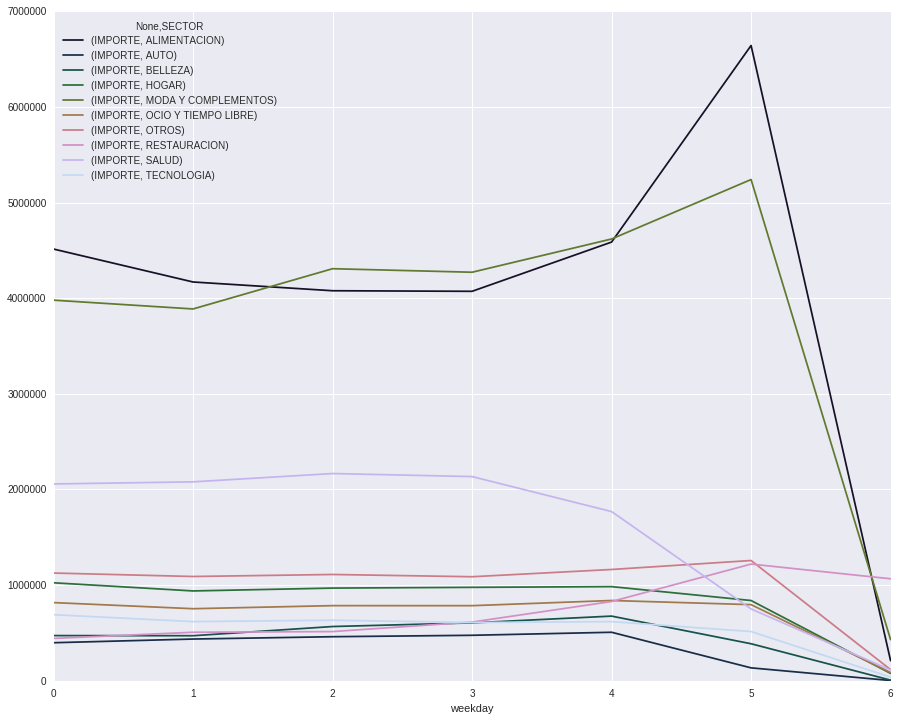

In [14]:
#matplotlib.rcParams['figure.figsize'] = (15, 12)
with sns.color_palette("cubehelix", 11):
    data[["weekday","SECTOR","IMPORTE"]]\
     .groupby(["weekday","SECTOR"]).sum()\
     .unstack().plot(figsize=(15,12))
plt.savefig("sector_weekday.svg")

### Sectores agregados por semana

In [15]:
ds = data[["weekofyear","SECTOR","IMPORTE"]]\
     .groupby(["weekofyear","SECTOR"]).sum()\
     .unstack()

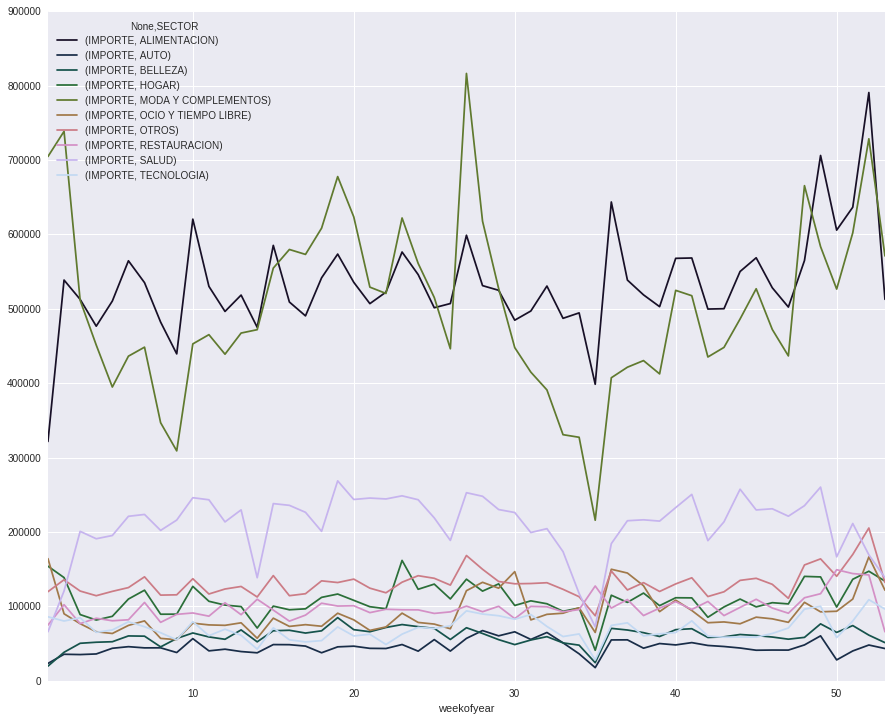

In [16]:
with sns.color_palette("cubehelix", 11):
    ds.plot(figsize=(15,12))
plt.savefig("sector_weekofyear.svg")

Se aplica una corrección por el número de días a la primera y la última semana. Tienen 4 días en lugar de 7.

In [17]:
ds.loc[1] = ds.loc[1]*7./4.
ds.loc[53] = ds.loc[53]*7./4.

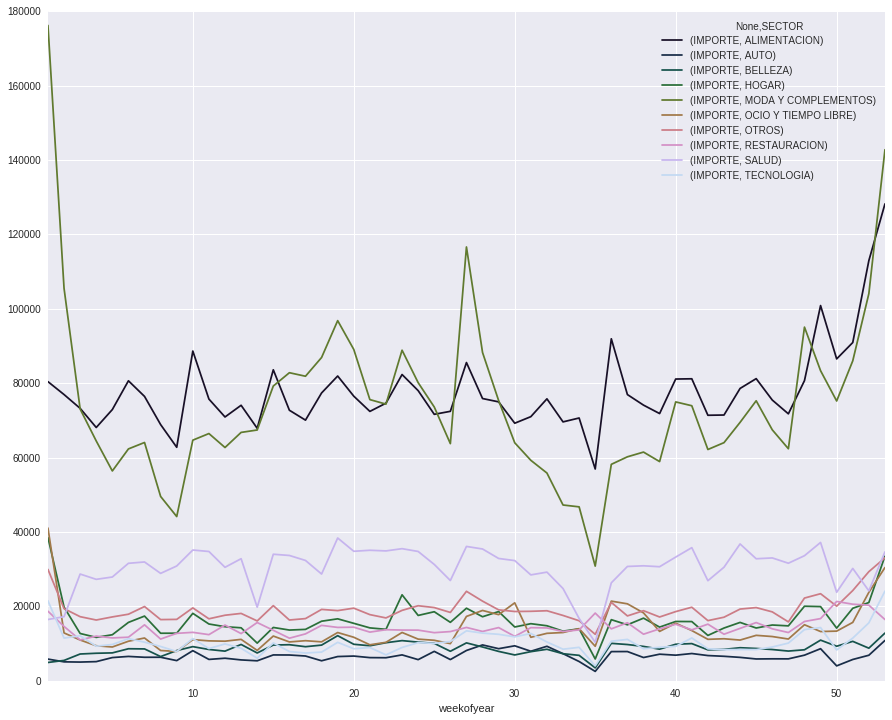

In [18]:
with sns.color_palette("cubehelix", 11):
    (ds/7.).plot(figsize=(15,12))
plt.savefig("sector_weekofyear_daily_pro.svg")

### Código postal semanal

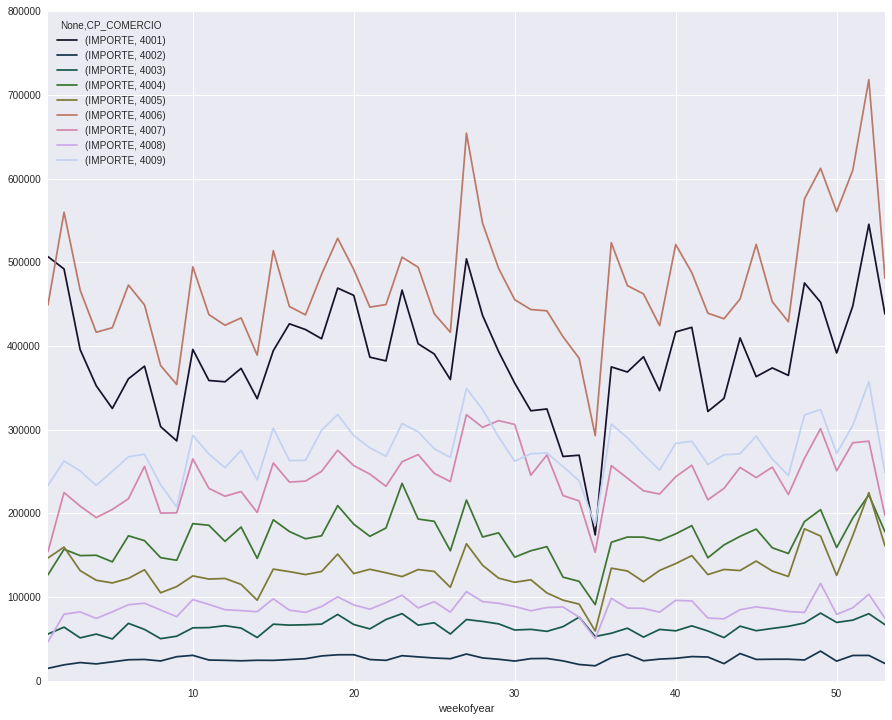

In [19]:
with sns.color_palette("cubehelix", 10):
    data[["weekofyear","CP_COMERCIO","IMPORTE"]]\
     .groupby(["weekofyear","CP_COMERCIO"]).sum()\
     .unstack().plot(figsize=(15,12))
plt.savefig("cp_weekofyear.svg")

In [20]:
dcps = data[["weekofyear","CP_COMERCIO","IMPORTE"]]\
     .groupby(["weekofyear","CP_COMERCIO"]).sum()\
     .unstack()

In [24]:
dcps_norm = dcps/dcps.min(axis=0)

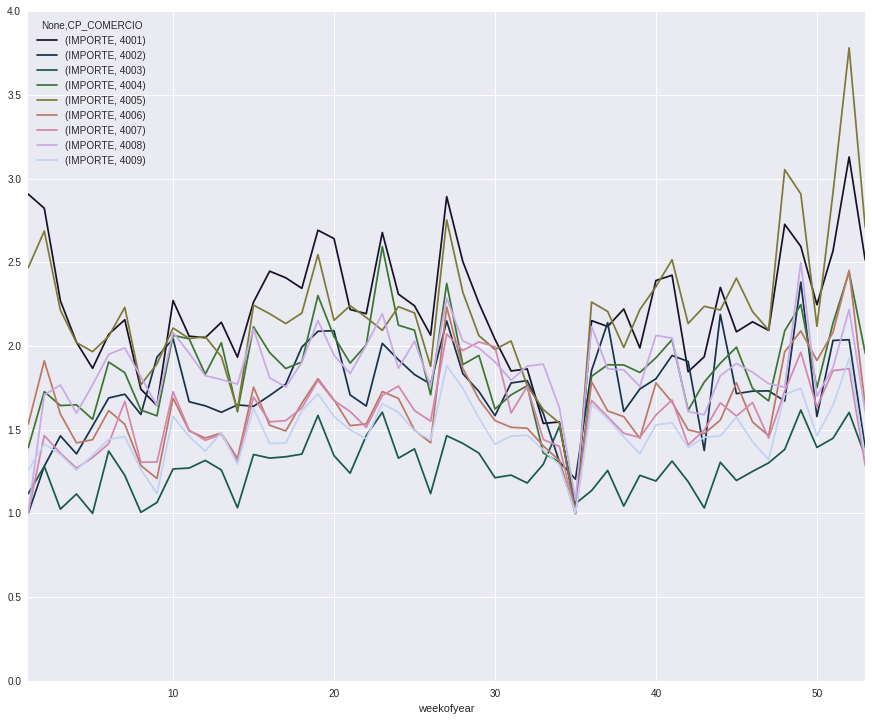

In [26]:
with sns.color_palette("cubehelix", 10):
    dcps_norm.plot(figsize=(15,12), ylim=[0,4])

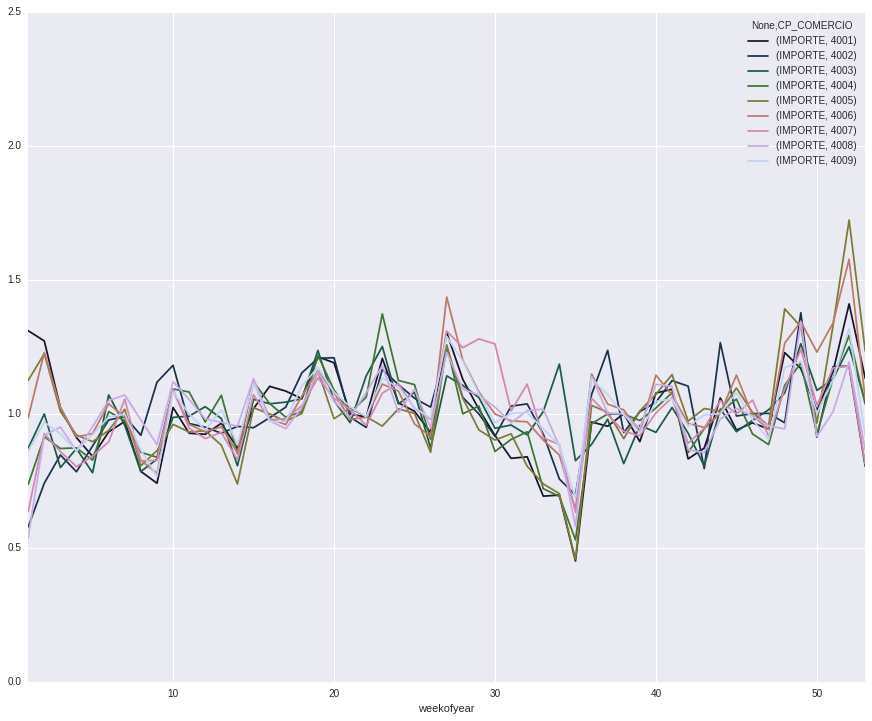

In [28]:
dcps_norm2 = dcps/dcps.median(axis=0)
with sns.color_palette("cubehelix", 10):
    dcps_norm2.plot(figsize=(15,12), ylim=[0,2.5])

## Otras

In [ ]:
with sns.color_palette("cubehelix", 10):
    data[["SECTOR","IMPORTE"]]\
     .groupby(["SECTOR"]).sum()\
     .unstack().plot(kind="pie", figsize=(5,5))

In [30]:
data[["CP_CLIENTE","IMPORTE"]]\
     .groupby(["CP_CLIENTE"]).sum()\
     .unstack()

         CP_CLIENTE
IMPORTE  4001           2098054.950000
         4002           2967523.770000
         4003           3477406.680000
         4004           5458974.110001
         4005           6069257.960001
         4006           8637165.860001
         4007          14994199.680001
         4008           6911794.400001
         4009          15204879.940001
         4100            452767.340000
         4110            949421.150000
         4113            105208.340000
         4114             20945.340000
         4115             25667.050000
         4116            105738.190000
         4117            803100.080000
         4118            209637.660000
         4120           3925757.050000
         4130           1495938.010000
         4131           1733669.960000
         4140            669473.530000
         4149             49606.110000
         4150            408517.490000
         4151            492715.230000
         4160             61789.160000
     

## Meteorología

Se añaden datos de las redes meteorológicas de agricultura (agroclimáticas) de la Junta de Andalucía. La resolución de los datos es de un día.

In [31]:
meteo = pd.read_fwf("Almeria.txt")

In [33]:
def parse_row_fecha(row):
    partes_fecha = [int(a) for a in row["FECHA"].split("-")]
    return "20{2}-{1}-{0}T12:00:00".format(*partes_fecha)
meteo['T'] = pd.to_datetime(meteo.apply(parse_row_fecha, axis=1))

In [35]:
meteo.columns

Index([u'FECHA', u'DIA', u'Al02TMax', u'Al02HTMax', u'Al02TMin', u'Al02HTMin',
       u'Al02TMed', u'Al02HumMax', u'Al02HumMin', u'Al02HumMed',
       u'Al02VelViento', u'Al02DirViento', u'Al02Rad', u'Al02Precip',
       u'Al02ETo', u'T'],
      dtype='object')

In [52]:
norm_viento = 50000 /  meteo["Al02VelViento"].max()
meteo[u"viento (m/s)"] = meteo["Al02VelViento"] # * norm
norm_pre = 50000 /  meteo["Al02Precip"].max()
meteo[u"precipitacion (mm)"] = meteo["Al02Precip"] #* norm
norm_pre = 50000 /  meteo["Al02Precip"].max()
meteo[u"temperatura máxima"] = meteo["Al02TMax"] #* norm

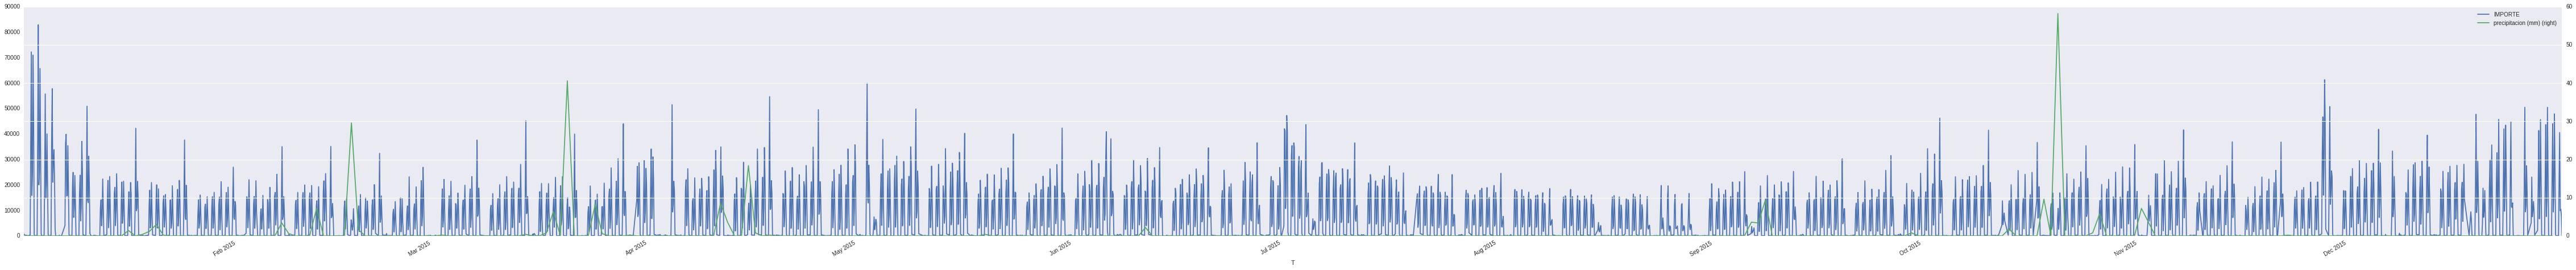

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(80,8))

data[data['SECTOR'] == "MODA Y COMPLEMENTOS"][["T","IMPORTE"]].groupby("T").sum().plot(ax=ax)
meteo.plot(x="T", y=u"precipitacion (mm)", ax=ax, secondary_y=True)
#meteo.plot(x="T", y=u"temperatura máxima", ax=ax, secondary_y=True)
#meteo.plot(x="T", y=u"viento (m/s)", ax=ax, secondary_y=True)


plt.savefig("myc_2horas_meteo.svg")

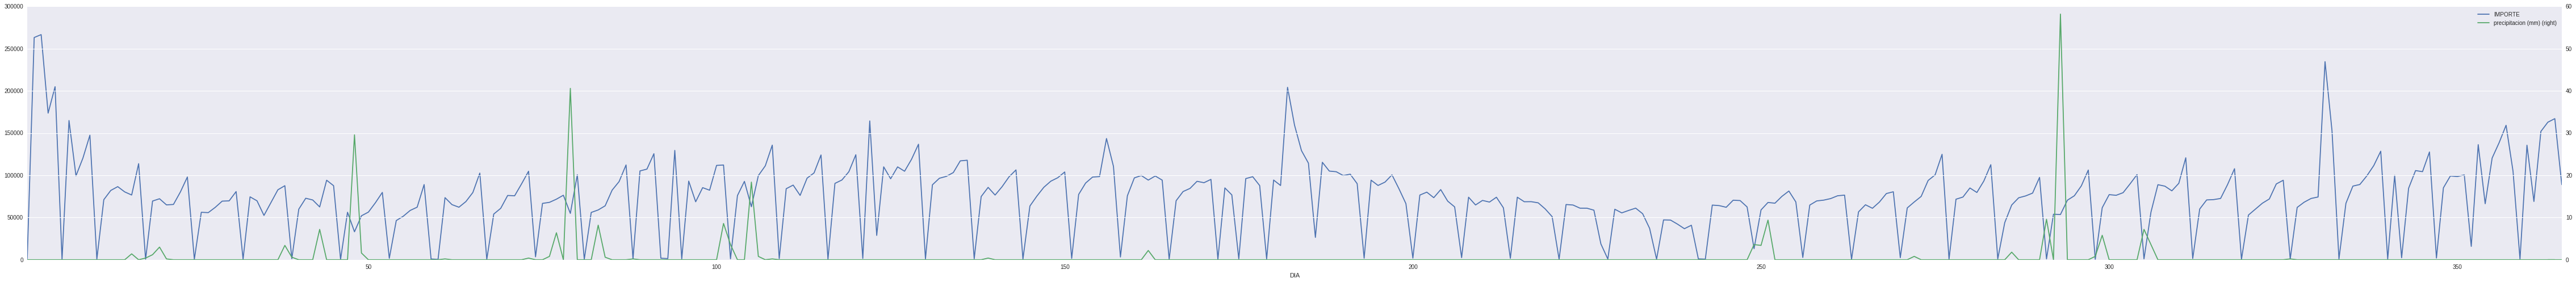

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(80,8))

data[data['SECTOR'] == "MODA Y COMPLEMENTOS"][["dayofyear","IMPORTE"]].groupby("dayofyear").sum().plot( ax=ax)
meteo.plot(x="DIA", y=u"precipitacion (mm)", ax=ax, secondary_y=True)
#meteo.plot(x="T", y=u"temperatura máxima", ax=ax, secondary_y=True)
#meteo.plot(x="T", y=u"viento (m/s)", ax=ax, secondary_y=True)


plt.savefig("myc_day_meteo.svg")

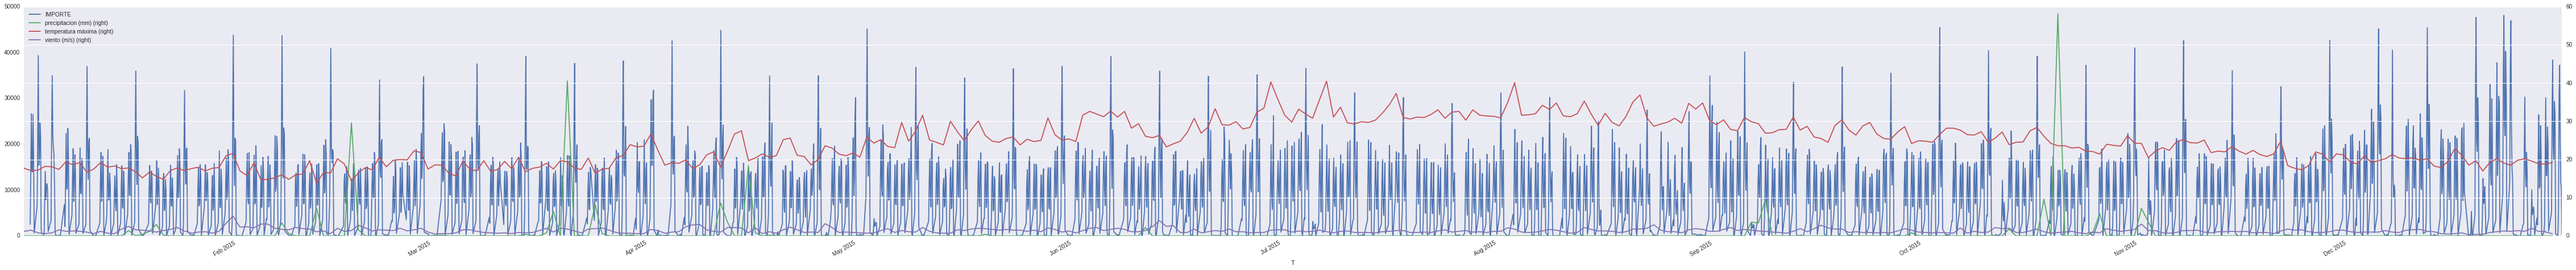

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(80,8))

data[data['SECTOR'] == "ALIMENTACION"][["T","IMPORTE"]].groupby("T").sum().plot( ax=ax)
meteo.plot(x="T", y=u"precipitacion (mm)", ax=ax, secondary_y=True)
meteo.plot(x="T", y=u"temperatura máxima", ax=ax, secondary_y=True)
meteo.plot(x="T", y=u"viento (m/s)", ax=ax, secondary_y=True)


plt.savefig("alimentacion_2horas_meteo.svg")

In [51]:
meteo["Al02TMax"][meteo["Al02TMax"] >= 40]

150    40.1
177    40.5
185    40.3
Name: Al02TMax, dtype: float64

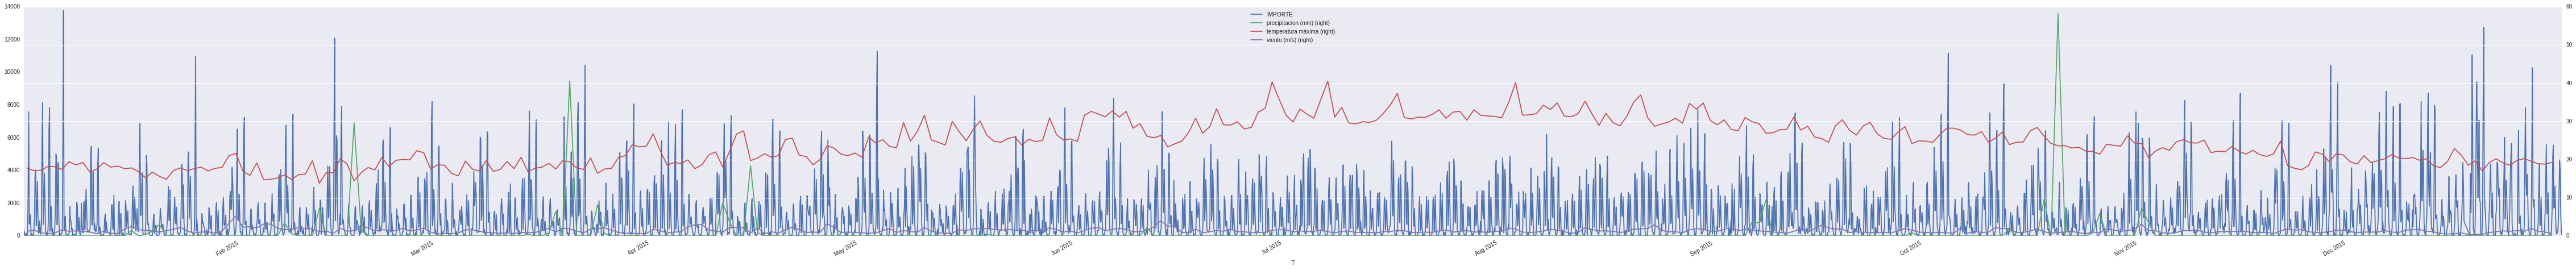

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(80,8))

data[data['SECTOR'] == "RESTAURACION"][["T","IMPORTE"]].groupby("T").sum().plot(ax=ax)
meteo.plot(x="T", y=u"precipitacion (mm)", ax=ax, secondary_y=True)
meteo.plot(x="T", y=u"temperatura máxima", ax=ax, secondary_y=True)
meteo.plot(x="T", y=u"viento (m/s)", ax=ax, secondary_y=True)


plt.savefig("restauracion_2horas_meteo.svg")